# What is Data Preprocessing ?

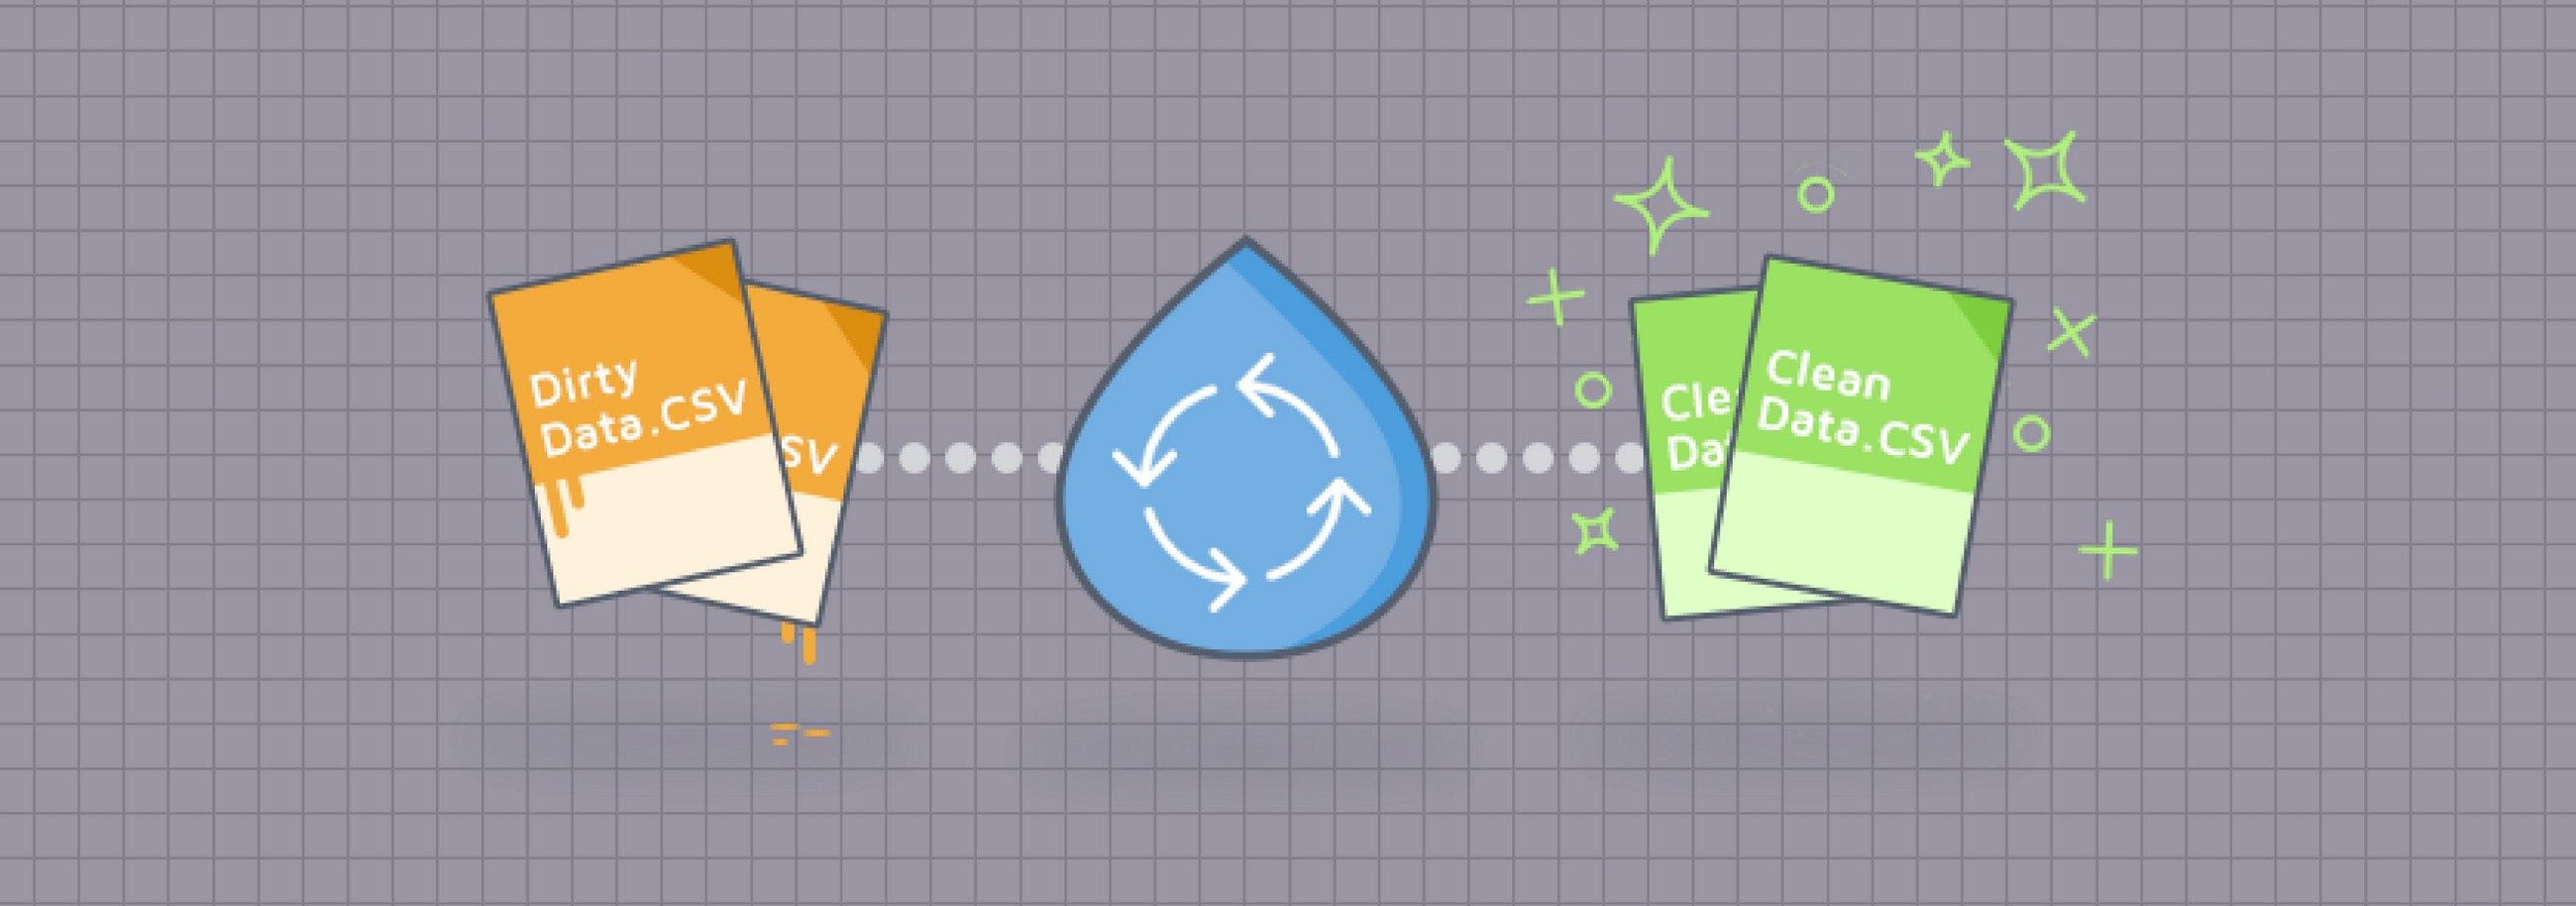

In [1]:
from IPython.display import Image
Image(filename="images/1.jpeg")

Data preprocessing is a data mining technique that involves transforming raw data into an understandable format. Real-world data is often incomplete, inconsistent, and/or lacking in certain behaviors or trends, and is likely to contain many errors. Data preprocessing is a proven method of resolving such issues.

# Data Preprocessing Importance :

When using data sets to train machine learning models, you'll often hear the phrase **"garbage in, garbage out"** This means that if you use bad or "dirty" data to train your model, you’ll end up with a bad, improperly trained model that won’t actually be relevant to your analysis.

Good, preprocessed data is even more important than the most powerful algorithms, to the point that machine learning models trained with bad data could actually be harmful to the analysis you're trying to do – giving you "garbage" results.

# Data pre-processing steps

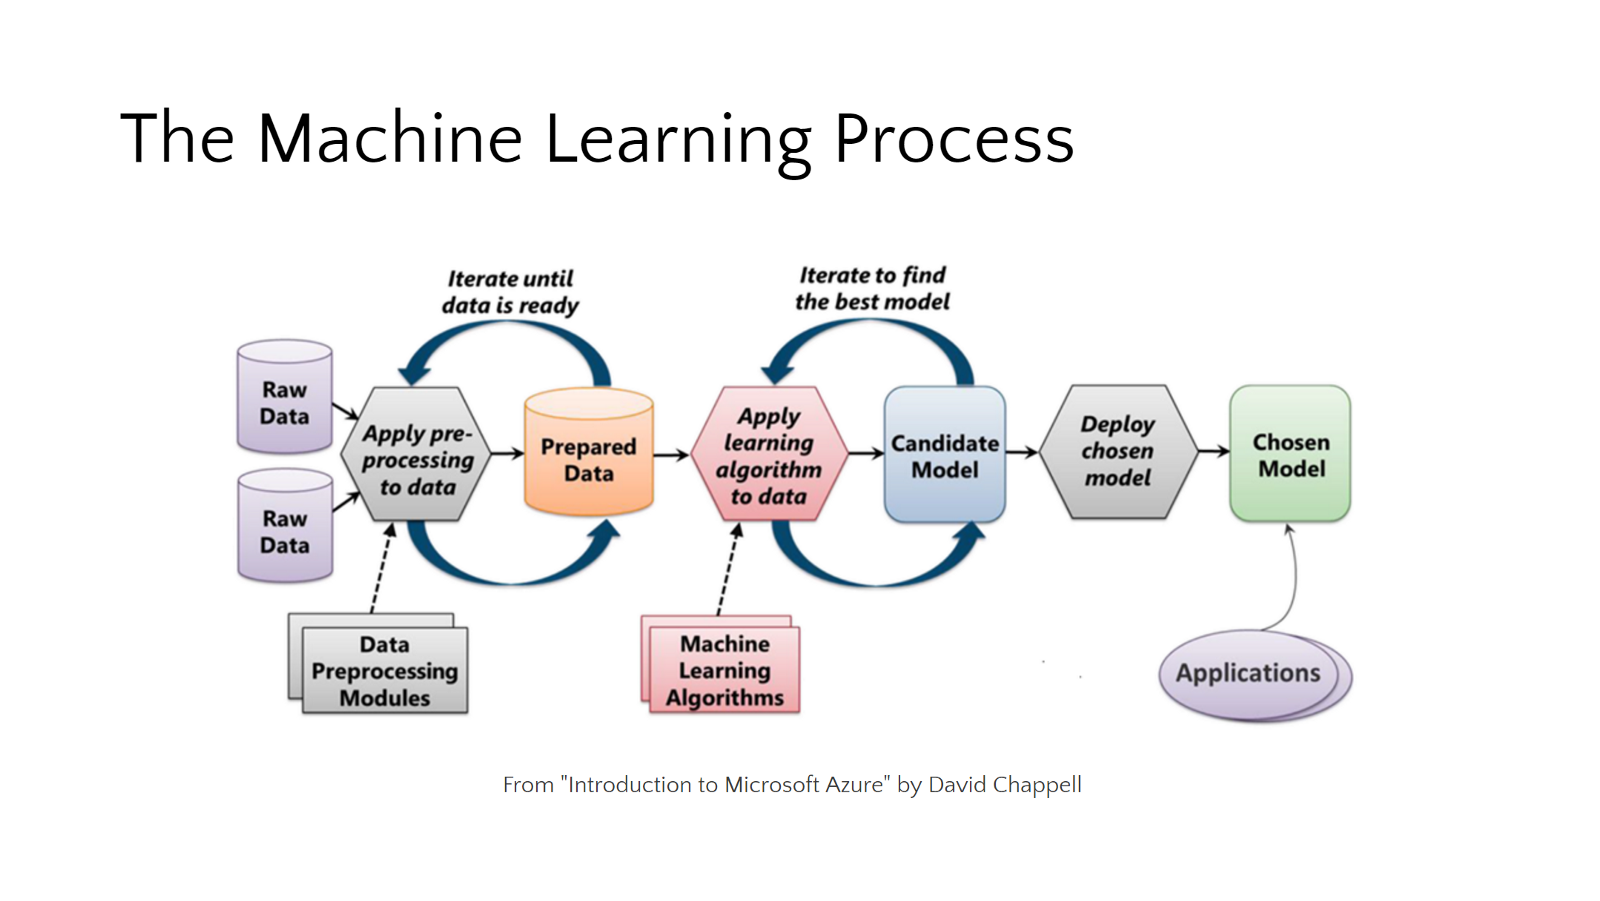

In [2]:
Image(filename="images/2.png")

In [2]:
#import the needed librairies
import pandas as pd
pd.options.display.max_columns = None
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import datetime as dt

In [3]:
#import the data
df = pd.read_csv("../data/fraud.csv")

In [4]:
df.shape

(100000, 23)

In [5]:
#show the first 3 row of the data
df.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [6]:
df = df.rename(columns={'Unnamed: 0': 'index'})
df.head(3)

,index,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,Malad City,ID,83252,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


Based on the EDA we will choose the following columns and we will do further selection using feature
selection techniques later

In [7]:
df= df[['trans_date_trans_time',  'category','amt', 'gender', 'zip','lat', 'long', 'dob','merch_lat', 'merch_long', 'is_fraud']]

In [8]:
df.shape

(100000, 11)

In [9]:
def transform_col_todate(df,col_names):
    for col in col_names:
        #convert trans_date_trans_time , dob to datetime
        df[col] = pd.to_datetime(df[col])
    return df

# Data preprocessing steps :

# Step 1 : Data Quality Assesement 

## **Check the data types of the columns** :

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   trans_date_trans_time  100000 non-null  object 
 1   category               100000 non-null  object 
 2   amt                    100000 non-null  float64
 3   gender                 100000 non-null  object 
 4   zip                    100000 non-null  int64  
 5   lat                    100000 non-null  float64
 6   long                   100000 non-null  float64
 7   dob                    100000 non-null  object 
 8   merch_lat              100000 non-null  float64
 9   merch_long             100000 non-null  float64
 10  is_fraud               100000 non-null  int64  
dtypes: float64(5), int64(2), object(4)
memory usage: 8.4+ MB


In [11]:
col_todate=["trans_date_trans_time","dob"]
df =  transform_col_todate(df,col_todate)

In [12]:
#create new columns day,month,year
df["year"]=df["trans_date_trans_time"].dt.year
df["month"]=df["trans_date_trans_time"].dt.month
df["day"]=df["trans_date_trans_time"].dt.day

In [13]:
#Extract hour,minute and second
df["hour"]=df["trans_date_trans_time"].dt.hour
df["minute"]=df["trans_date_trans_time"].dt.minute
df["sec"]=df["trans_date_trans_time"].dt.second

In [14]:
df.head(3)

,trans_date_trans_time,category,amt,gender,zip,lat,long,dob,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,sec
0,2019-01-01 00:00:18,misc_net,4.97,F,28654,36.0788,-81.1781,1988-03-09,36.011293,-82.048315,0,2019,1,1,0,0,18
1,2019-01-01 00:00:44,grocery_pos,107.23,F,99160,48.8878,-118.2105,1978-06-21,49.159047,-118.186462,0,2019,1,1,0,0,44
2,2019-01-01 00:00:51,entertainment,220.11,M,83252,42.1808,-112.2620,1962-01-19,43.150704,-112.154481,0,2019,1,1,0,0,51


In [15]:
#Extract age of card holder column
df['age']=dt.date.today().year-pd.to_datetime(df['dob']).dt.year

In [16]:
#drop unusefull columns
df.drop(["dob","trans_date_trans_time"],axis=1,inplace=True)

In [17]:
df.head(3)

,category,amt,gender,zip,lat,long,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,sec,age
0,misc_net,4.97,F,28654,36.0788,-81.1781,36.011293,-82.048315,0,2019,1,1,0,0,18,36
1,grocery_pos,107.23,F,99160,48.8878,-118.2105,49.159047,-118.186462,0,2019,1,1,0,0,44,46
2,entertainment,220.11,M,83252,42.1808,-112.2620,43.150704,-112.154481,0,2019,1,1,0,0,51,62


## **Check if there is any duplicated values** :

In [18]:
df.duplicated().sum() #there is no duplicated values in the dataset

0

## Two ways to handle Missing Values in Data Preprocessing:

### Drop the Missing Values

This data preprocessing method is commonly used to handle the null values. Here, we either delete a particular row if it has a null value for a particular feature and a particular column if it has more than 75% of missing values.

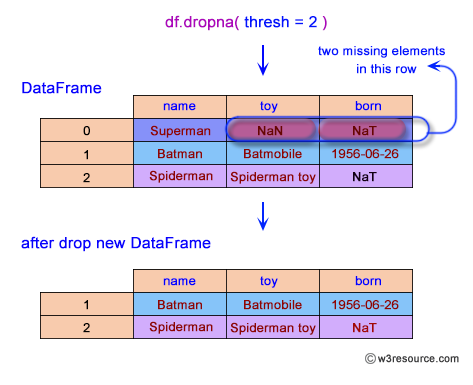

In [19]:
Image(filename="images/4.png")

### Replace the Missing Value

This strategy can be applied on a feature which has numeric data like the year column or Home team goal column. We can calculate the mean, median or mode of the feature and replace it with the missing values.

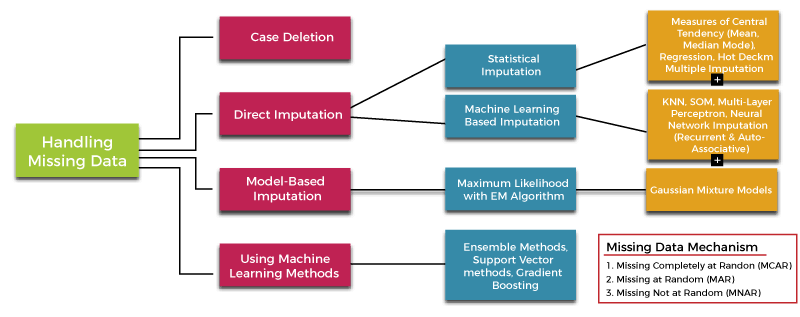

In [20]:
Image(filename="images/5.png")

## Check out the Missing values :

In [21]:
df.isnull().sum()

category      0
amt           0
gender        0
zip           0
lat           0
long          0
merch_lat     0
merch_long    0
is_fraud      0
year          0
month         0
day           0
hour          0
minute        0
sec           0
age           0
dtype: int64

In [22]:
#select numerical features
num_features= df.select_dtypes(include=['integer']).columns.tolist() 

In [23]:
num_features.remove('is_fraud')

In [24]:
num_features

['zip', 'year', 'month', 'day', 'hour', 'minute', 'sec', 'age']

## Transform the Categorical Values :

Since, machine learning models are based on Mathematical equations and you can intuitively understand that it would cause some problem if we can keep the Categorical data in the equations because we would only want numbers in the equations.

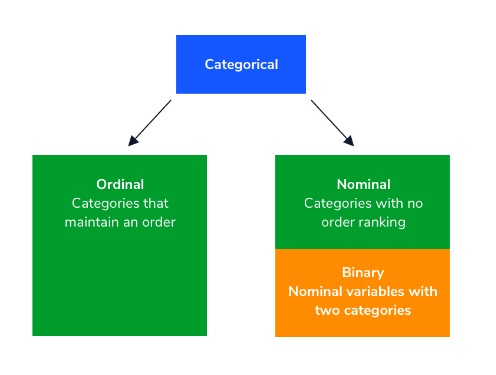

In [25]:
Image(filename="images/6.png")

In [26]:
#select categorical features
categ_features= df.select_dtypes(include=['object']).columns.tolist() 

In [27]:
categ_features

['category', 'gender']

Machine learning models require numeric inputs. **Encoding and One-Hot Encoding** are implemented to convert these categorical data into numerical form (0 or 1).

In [28]:
encode_dict = {  # Encoding dictionary
    'F':0, 'M':1}
df['gender'] = df['gender'].map(encode_dict)

# What are Dummy Variables in Data Preprocessing?

Dummy Variables is one that takes the value 0 or 1 to indicate the absence or presence of some categorical effect that may be expected to shift the outcome.





Instead of having one column here above, we are going to have three column.
## Number of Columns = Number of Categories



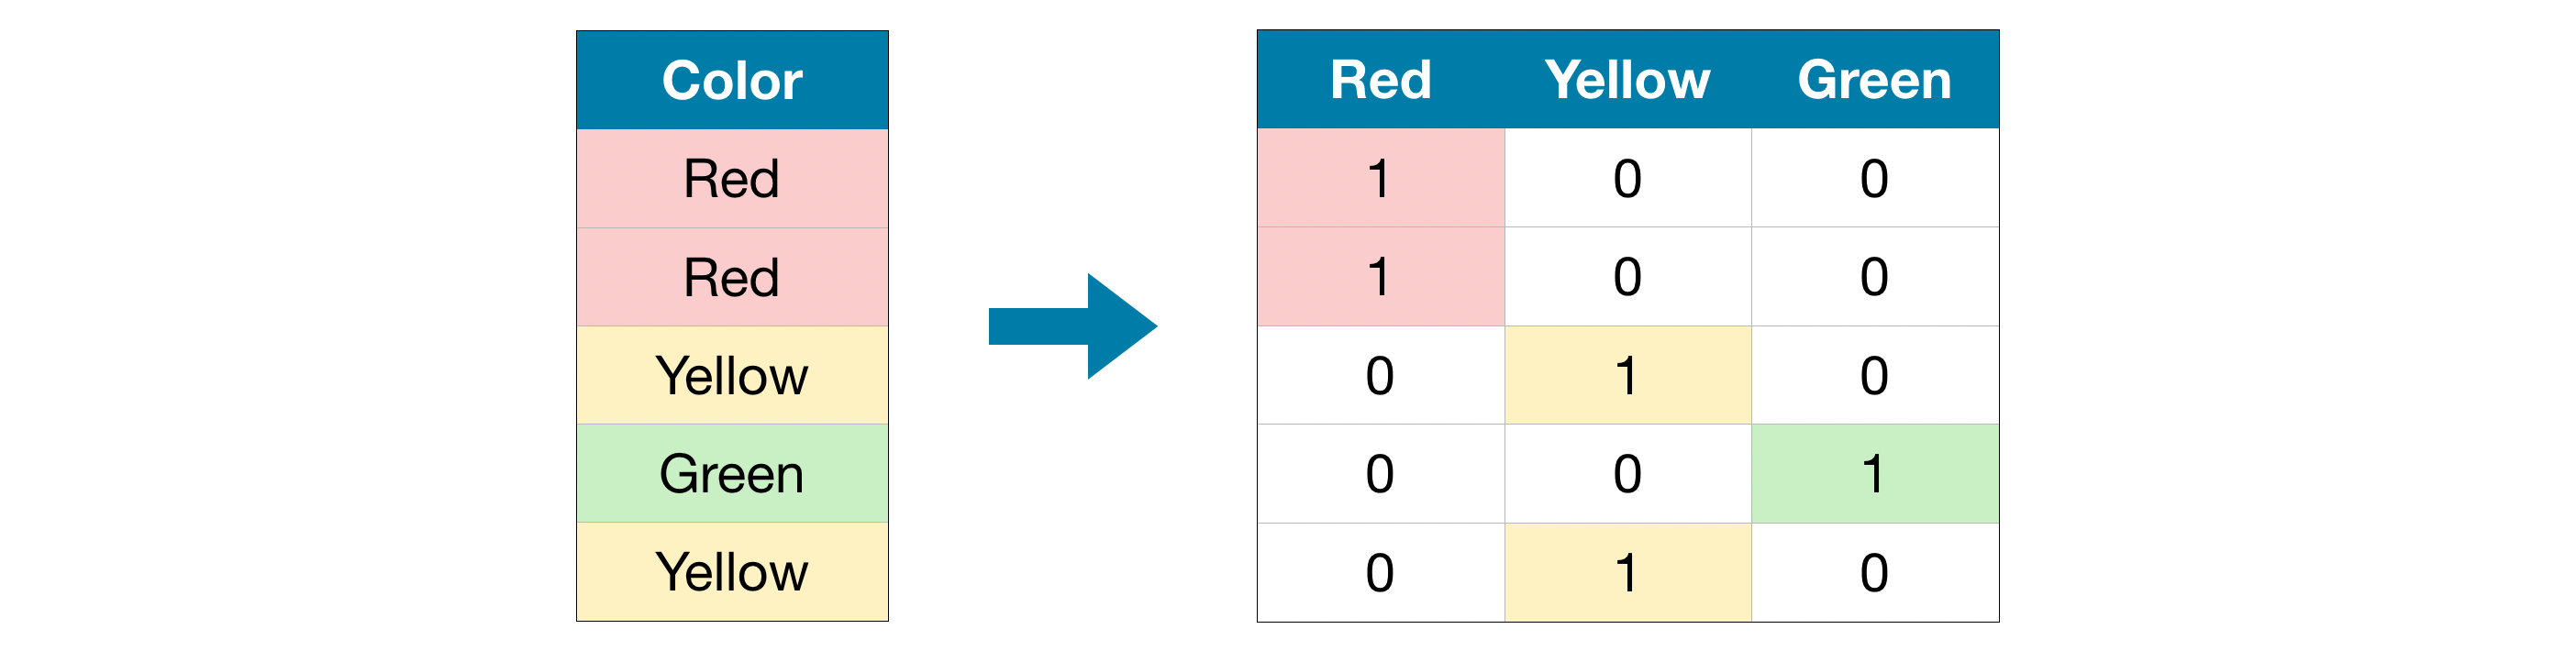

In [29]:
Image(filename="images/7.png")

In [30]:
dummy_cols = ['category']
df = pd.get_dummies(df, columns=dummy_cols,dtype=float)

In [31]:
df.columns

Index(['amt', 'gender', 'zip', 'lat', 'long', 'merch_lat', 'merch_long',
       'is_fraud', 'year', 'month', 'day', 'hour', 'minute', 'sec', 'age',
       'category_entertainment', 'category_food_dining',
       'category_gas_transport', 'category_grocery_net',
       'category_grocery_pos', 'category_health_fitness', 'category_home',
       'category_kids_pets', 'category_misc_net', 'category_misc_pos',
       'category_personal_care', 'category_shopping_net',
       'category_shopping_pos', 'category_travel'],
      dtype='object')

In [32]:
df.head(3)

,amt,gender,zip,lat,long,merch_lat,merch_long,is_fraud,year,month,day,hour,minute,sec,age,category_entertainment,category_food_dining,category_gas_transport,category_grocery_net,category_grocery_pos,category_health_fitness,category_home,category_kids_pets,category_misc_net,category_misc_pos,category_personal_care,category_shopping_net,category_shopping_pos,category_travel
0,4.97,0,28654,36.0788,-81.1781,36.011293,-82.048315,0,2019,1,1,0,0,18,36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,107.23,0,99160,48.8878,-118.2105,49.159047,-118.186462,0,2019,1,1,0,0,44,46,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,220.11,1,83252,42.1808,-112.2620,43.150704,-112.154481,0,2019,1,1,0,0,51,62,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Splitting the data-set into Training and Test Set

In any Machine Learning model is that we’re going to split data-set into two separate sets





1. Training Set
2. Test Set
Why we need splitting ?





Well here it’s your algorithm model that is going to learn from your data to make predictions. Generally we split the data-set into 70:30 ratio or 80:20 what does it mean, 80 percent data take in train and 20 percent data take in test. However, this Splitting can be varies according to the data-set shape and size.

In [33]:
X = df.drop('is_fraud', axis=1)  # Select features
y = df['is_fraud']  # Target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1)  # Split data 80/20

In [34]:
#Save the training and testing data files to be used in testing later
df_train = pd.concat([X_train,y_train],axis=1)
df_test = pd.concat([X_test,y_test],axis=1)
df_train.to_csv("../data/train_data.csv",index=False)
df_test.to_csv("../data/test_data.csv",index=False)

In [35]:
print(f"Train size {df_train.shape}")
print(f"Test size {df_test.shape}")

Train size (80000, 29)
Test size (20000, 29)
